C:\Users\vatch\AppData\Local\Temp\ipykernel_23228\3679425839.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vatch\AppData\Local\Temp\ipykernel_23228\3679425839.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

🔍 Accuracy Comparison:

        Model  Accuracy
Random Forest  0.821229
      XGBoost  0.804469
Stacked Model  0.810056


C:\Users\vatch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


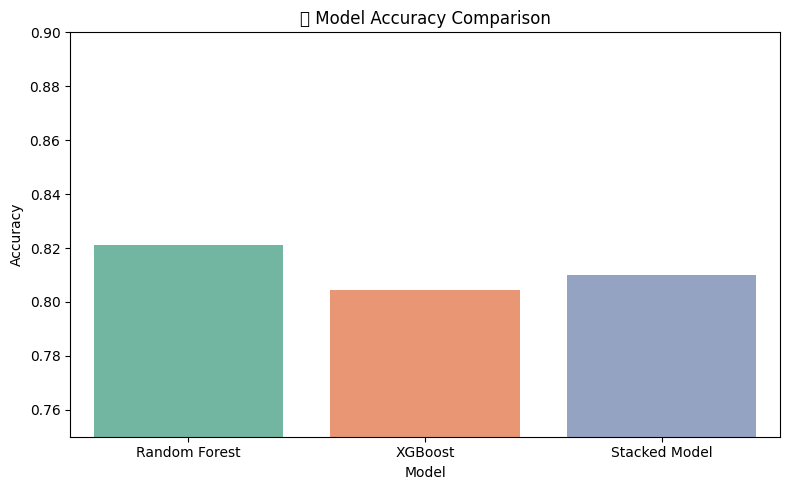


📋 Classification Report for Stacked Model:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [1]:
# Install required packages if not already installed
# pip install xgboost pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocessing
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Meta-model
meta_model = LogisticRegression()

# Stacking classifier
stacked_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5
)

# Fit models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
stacked_model.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
stacked_preds = stacked_model.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, rf_preds)
acc_xgb = accuracy_score(y_test, xgb_preds)
acc_stack = accuracy_score(y_test, stacked_preds)

# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Stacked Model'],
    'Accuracy': [acc_rf, acc_xgb, acc_stack]
})

print("🔍 Accuracy Comparison:\n")
print(comparison.to_string(index=False))

# Optional: Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette='Set2')
plt.title("📊 Model Accuracy Comparison")
plt.ylim(0.75, 0.9)
plt.tight_layout()
plt.show()

# Classification report for stacked model
print("\n📋 Classification Report for Stacked Model:\n")
print(classification_report(y_test, stacked_preds))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

C:\Users\vatch\AppData\Local\Temp\ipykernel_23228\1597337669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vatch\AppData\Local\Temp\ipykernel_23228\1597337669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

print(X)
print(y)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500      True       False        True
1         1  38.0      1      0  71.2833     False       False       False
2         3  26.0      0      0   7.9250     False       False        True
3         1  35.0      1      0  53.1000     False       False        True
4         3  35.0      0      0   8.0500      True       False        True
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000      True       False        True
887       1  19.0      0      0  30.0000     False       False        True
888       3  28.0      1      2  23.4500     False       False        True
889       1  26.0      0      0  30.0000      True       False       False
890       3  32.0      0      0   7.7500      True        True       False

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
331       1  45.5      0      0   28.5000      True       False        True
733       2  23.0      0      0   13.0000      True       False        True
382       3  32.0      0      0    7.9250      True       False        True
704       3  26.0      1      0    7.8542      True       False        True
813       3   6.0      4      2   31.2750     False       False        True
..      ...   ...    ...    ...       ...       ...         ...         ...
106       3  21.0      0      0    7.6500     False       False        True
270       1  28.0      0      0   31.0000      True       False        True
860       3  41.0      2      0   14.1083      True       False        True
435       1  14.0      1      2  120.0000     False       False        True
102       1  21.0      0      1   77.2875      True       False        True

[712 rows x 8 columns]      Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [14]:
meta_model = LogisticRegression()

In [15]:
stacked_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5
)


In [16]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
stacked_model.fit(X_train, y_train)


C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:40:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=Non...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

In [17]:
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
stacked_preds = stacked_model.predict(X_test)


In [19]:
print("rf_preds:",rf_preds )
print("xgb_preds:",xgb_preds )
print("stacked_preds:",stacked_preds)

rf_preds: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
xgb_preds: [0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
stacked_preds: [0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 

In [20]:
acc_rf = accuracy_score(y_test, rf_preds)
acc_xgb = accuracy_score(y_test, xgb_preds)
acc_stack = accuracy_score(y_test, stacked_preds)

In [21]:
print("acc_rf:",acc_rf )
print("acc_xgb :",acc_xgb  )
print("acc_stack:",acc_stack)

acc_rf: 0.8212290502793296
acc_xgb : 0.8044692737430168
acc_stack: 0.8100558659217877


In [22]:
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Stacked Model'],
    'Accuracy': [acc_rf, acc_xgb, acc_stack]
})


In [24]:

print("Accuracy Comparison:\n")
print(comparison.to_string(index=False))

Accuracy Comparison:

        Model  Accuracy
Random Forest  0.821229
      XGBoost  0.804469
Stacked Model  0.810056


C:\Users\vatch\AppData\Local\Temp\ipykernel_23228\4091630198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison, palette='Set2')


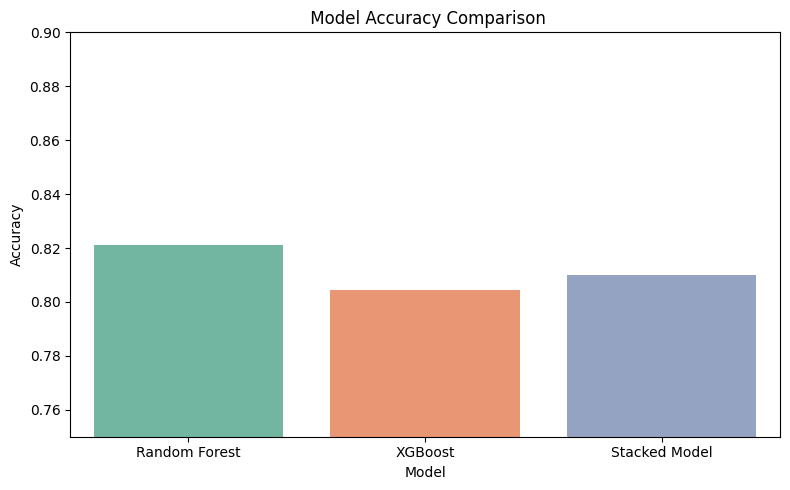

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette='Set2')
plt.title(" Model Accuracy Comparison")
plt.ylim(0.75, 0.9)
plt.tight_layout()
plt.show()

In [27]:
print("\n📋 Classification Report for Stacked Model:\n")
print(classification_report(y_test, stacked_preds))


📋 Classification Report for Stacked Model:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

